In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

# 随机梯度下降
假设给定$n$个样本的训练数据集, 假设$f_i(\mathbf{x})$ 是关于索引$i$的训练样本的损失函数, 其中 $\mathbf{x}$ 是参数向量, 那么可以得到目标函数:
$$
f(\mathbf{x}) = \frac{1}{n} \sum_{i=1}^n f_i(\mathbf{x})
$$
那么 $\mathbf{x}$ 的目标函数的梯度计算为:
$$
\nabla f(\mathbf{x}) = \frac {1}{n} \sum_{i=1}^n \nabla f_i(\mathbf{x})
$$
但是如果每一次梯度下降都计算 $\nabla f(\mathbf{x})$, 那么每一次的计算代价都是 $\mathbf{O}(n)$

随机梯度下降(`SGD`) 可以降低每一次迭代中的计算代价, 在随机梯度下降的每一次迭代中, 对数据样本随机均匀采样一个索引$i$, 其中 $i \in \{1, \ldots, n\}$, 计算梯度 $\nabla f_i(\mathbf{x})$ 来更新 $\mathbf{x}$:
$$
\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f_i(\mathbf{x})
$$
这样计算代价就可以降低到 $O(1)$, 并且随机梯度 $\nabla f_i(\mathbf{x})$ 是对于完整梯度 $\nabla f(\mathbf{x})$ 的无偏估计

epoch 50, x1: 0.112693, x2: 0.107211


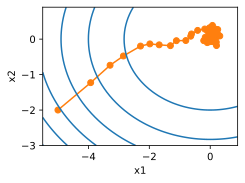

In [3]:
def f(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # 目标函数的梯度
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # 模拟有噪声的梯度
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # 常数学习速度
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

可以发现随机梯度下降中变量的轨迹比较嘈杂, 这是由于梯度的随机性质, 也就是即使接近最小值, 依然受到通过 $\eta \nabla f_i(\mathbf{x})$ 的瞬间梯度所注入的不确定性的影响 ; 所以此时这里可以做的改变就是改变改变学习率从而优化随机梯度下降的效果

## 动态学习率
可以使用与时间相关的学习率 $\eta(t)$取代 $\eta$增加控制优化算方法收敛的复杂性, 同时需要弄清楚 $\eta$ 的衰减速度, 如果太快, 就可以过早停止优化,比如如下是一种随着时间推移调整$\eta$使用的一些基本策略:
$$
\begin{align*}
\eta(t) &= \eta_i \ \text{if} \ t_i \leq t \leq t_{i+1} & \text{分段常数} \\
\eta(t) &= \eta_0 \cdot e^{-\lambda t} & \text{指数衰减} \\
\eta(t) &= \eta_0 \cdot (\beta t + 1)^{-\alpha} & \text{多项式衰减}
\end{align*}
$$
一般来说的就是 $t$ 增大的时候 $\eta$ 逐渐减小, 从而保证接近极值点的时候收敛速度降低

epoch 1000, x1: -1.007491, x2: -0.069671


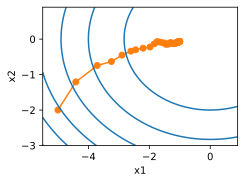

In [4]:
def exponential_lr():
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

可以发现, 参数的方差减少了, 但是没有收敛到最优解 $\mathbf{x} = (0, 0)$ , 这是有与利用指数函数后期衰减很严重